In [1]:
import pandas as pd       # using pandas for data manipulation
import matplotlib.pyplot as plt  # using matplotlib for visulization
import numpy as np  
import math# using numpy for array and matrix operations
from sklearn.model_selection import train_test_split  # using sklearn for splitting our data in test and train data respectively

In [54]:
df= pd.read_csv('ex2data1.txt')           # reading data in dataframe using pandas read csv function
df.columns=['exam1_score','exam2_score','decision']        # renaming columns just to add clarity
df=np.asarray(df)

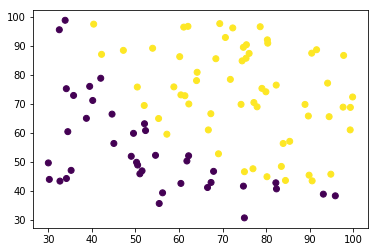

In [55]:
plt.scatter(df[:,0],df[:,1],c=df[:,2])
plt.show()

In [9]:
def sigmoid(inX):
    r = 1.0/(1+ np.exp(-inX))
    return r    

In [57]:
data= pd.read_csv('ex2data1.txt')           # reading data in dataframe using pandas read csv function
data.columns=['exam1_score','exam2_score','decision']        # renaming columns just to add clarity

In [58]:
features=data[['exam1_score','exam2_score']].copy()  # adding features to list
price=data['decision'].copy()                # adding actual output to list
features=pd.DataFrame(features)           # reading features as a dataframe
features.insert(0, 'bias', 1)             # Adding bias term to make multiplication feasible 
price=np.asarray(price,dtype=np.float64)  # converting in numpy 
features=np.asarray(features,dtype=np.float64) # converting in numpy

In [59]:
mean_size=features[:,1].mean()  # calculating mean of size feature
std_size=features[:,1].std()    # calculating std of size feature
features[:,1] = features[:,1]-(mean_size) # normalizing feature size
features[:,1] =features[:,1]/ (std_size)  # normalizing feature size

mean_bed=features[:,2].mean()   # calculating mean of bedroom feature
std_bed=features[:,2].std()     # calculating std of bedroom feature
features[:,2] = features[:,2]- mean_bed # normalizing feature size
features[:,2] = features[:,2]/std_bed  # normalizing feature size
features1=np.transpose(features)   # taking transpose of our feature vector

In [60]:
X_train, X_test, y_train, y_test = train_test_split(features,price, test_size=0, random_state=40) # splitting data in test[0.33] and train[0.67]

In [61]:
X_train=np.asarray(X_train) # converting series in array
y_train=np.asarray(y_train) # converting series in array
X_test=np.asarray(X_test) # converting series in array
y_test=np.asarray(y_test) # converting series in array
XT=np.transpose(X_train)

In [89]:
total_features=2        # genralizing the number of fetaures . 
thetas=np.zeros(total_features+1) #making our paramters equal to the number of features 
alpha= 0.1    #learning rate 0.1
epochs=5000   # epoch 1000
costs=[]   
epoch=[]
for e in range (epochs):
    epoch.append(e)  # appending epoches for visulization
    thetas=thetas-(alpha/len(y_train))*((np.dot(XT,((sigmoid(np.dot(X_train,thetas)))-y_train)))) # updating parameter values    
    temp=sigmoid(np.dot(X_train,thetas))
    cost= 1/m*(-1*np.dot(np.transpose(y_train),np.log(temp))-1*np.dot(np.transpose((1-y_train)),np.log(1-temp)))
    costs.append(cost) # appending cost for visulization

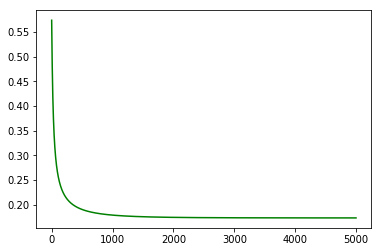

In [90]:
plt.plot(epoch,costs,color='g') # ploting cost against epochs

In [91]:
def predict_price(size,bedroom):
    return(sigmoid((thetas[0]*1+thetas[1]*size+thetas[2]*bedroom)))

In [92]:
print(predict_price((45-mean_size)/std_size,(85-mean_bed)/std_bed))

0.7768459994193255


In [93]:
y=[] # list initialize
for i in range (0,len(X_train)):  # running for test data
    y.append(sigmoid(thetas[0]+thetas[1]*X_train[:,1][i]+thetas[2]*X_train[:,2][i]))  # computing our hypothesis function and appending in a python list

In [94]:
thetas

array([1.7261453 , 3.84061664, 3.64320242])

In [95]:
cost

0.1731104799092862

In [2]:
from sklearn.preprocessing import PolynomialFeatures

In [3]:
df= pd.read_csv('ex2data2.txt')           # reading data in dataframe using pandas read csv function
df.columns=['test1','test2','decision']        # renaming columns just to add clarity
data=df

In [4]:
features=data[['test1','test2']].copy()  # adding features to list
chipAcceptance=data['decision'].copy()                # adding actual output to list
features=pd.DataFrame(features)           # reading features as a dataframe
#features.insert(0, 'bias', 1)             # Adding bias term to make multiplication feasible 
chipAcceptance=np.asarray(chipAcceptance,dtype=np.float64)  # converting in numpy 
features=np.asarray(features,dtype=np.float64) # converting in numpy

In [5]:
poly = PolynomialFeatures(6)
features=poly.fit_transform(features)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(features,chipAcceptance, test_size=0, random_state=40) # splitting data in test[0.33] and train[0.67]

In [7]:
X_train=np.asarray(X_train) # converting series in array
y_train=np.asarray(y_train) # converting series in array
X_test=np.asarray(X_test) # converting series in array
y_test=np.asarray(y_test) # converting series in array
XT=np.transpose(X_train)

In [22]:
total_features=27        # genralizing the number of fetaures . 
thetas=np.zeros(total_features+1) #making our paramters equal to the number of features 
alpha= 0.01    #learning rate 0.1
epochs=5000   # epoch 1000
lambdaa=1.0
costs=[]   
epoch=[]
m=len(y_train)
for e in range (epochs):
    epoch.append(e)  # appending epoches for visulization
    theta0=thetas-(alpha/len(y_train))*((np.dot(XT,((sigmoid(np.dot(X_train,thetas)))-y_train))))
    thetas=thetas*(1-(alpha)*(lambdaa/len(y_train)))-(alpha/len(y_train))*((np.dot(XT,((sigmoid(np.dot(X_train,thetas)))-y_train)))) # updating parameter values    
    thetas[0]=theta0[0]
    temp=sigmoid(np.dot(X_train,thetas))
    cost= 1/m*(-1*np.dot(np.transpose(y_train),np.log(temp))-1*np.dot(np.transpose((1-y_train)),np.log(1-temp)))
   
    #cost=(np.dot(np.transpose(temp),temp))/(2*len(y_train))
    cost=cost+(lambdaa/(2*m))*np.sum(np.square(thetas[1:]))
    costs.append(cost) # appending cost for visulization

In [23]:
cost

0.5544953217128789